In [53]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
brand=[]
price=[]
rating_reviews=[]


In [54]:
for i in range(1,41):
    url="https://www.flipkart.com/search?q=washing+machines&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=RECENT&suggestionId=washing+machines%7CWashing+Machines&requestId=5ce5e2aa-f9d2-4b71-a618-5b72c7a981c8&as-searchtext=was&page="+str(i)
    data=requests.get(url)
    soup =BeautifulSoup(data.text,'lxml')
    page=soup.find('div', class_="_1YokD2 _3Mn1Gg")
    brand_name=page.find_all('div',class_='_4rR01T')
    product_price=page.find_all('div',class_='_30jeq3 _1_WHN1')
    ratings=page.find_all('div',class_="gUuXy-")
    
    for i in brand_name:
        brand.append(i.text)
    for j in product_price:
        price.append(j.text)
    for k in ratings:
        rating_reviews.append(k.text)

In [56]:
print(len(brand))
print(len(price))
print(len(rating_reviews))

947
947
766


In [488]:
df1=pd.DataFrame({'brand':brand,'price':price})
df2=pd.DataFrame({'rating_reviews':rating_reviews})

In [489]:
df1


,brand,price
0,MarQ by Flipkart 6 kg 5 Star Rating Semi Autom...,"₹7,090"
1,SAMSUNG 7 kg Diamond Drum feature Fully Automa...,"₹15,790"
2,LG 7 kg 5 star rating and Wind jet dry Semi Au...,"₹11,990"
3,realme TechLife 7.5 kg 5 Star Rating Fabric Sa...,"₹12,290"
4,SAMSUNG 6 kg 5 Star With Hygiene Steam and Cer...,"₹22,990"
...,...,...
942,Siemens 7.5 kg Fully Automatic Front Load Wash...,"₹34,900"
943,SAMSUNG 7 kg Diamond Drum feature Fully Automa...,"₹15,790"
944,NU 6.5 kg Fully Automatic Top Load Washing Mac...,"₹12,490"
945,Gangnam Street 8 Kg Semi Automatic Top Load Wa...,"₹8,399"


In [490]:
df2

,rating_reviews
0,"4.358,061 Ratings & 6,574 Reviews"
1,"4.35,815 Ratings & 462 Reviews"
2,"4.511,579 Ratings & 878 Reviews"
3,"4.219,993 Ratings & 2,444 Reviews"
4,"4.428,567 Ratings & 2,777 Reviews"
...,...
761,"4.324,694 Ratings & 2,045 Reviews"
762,4.34 Ratings & 0 Reviews
763,4.4944 Ratings & 113 Reviews
764,"4.358,061 Ratings & 6,574 Reviews"


In [63]:
# I need to concatenate because of missing ratings in the list of flipkart review 
df = pd.concat([df1, df2], axis=1, join='inner')

In [64]:
df

,brand,price,rating_reviews
0,MarQ by Flipkart 6 kg 5 Star Rating Semi Autom...,"₹7,090","4.358,061 Ratings & 6,574 Reviews"
1,SAMSUNG 7 kg Diamond Drum feature Fully Automa...,"₹15,790","4.35,815 Ratings & 462 Reviews"
2,LG 7 kg 5 star rating and Wind jet dry Semi Au...,"₹11,990","4.511,579 Ratings & 878 Reviews"
3,realme TechLife 7.5 kg 5 Star Rating Fabric Sa...,"₹12,290","4.219,993 Ratings & 2,444 Reviews"
4,SAMSUNG 6 kg 5 Star With Hygiene Steam and Cer...,"₹22,990","4.428,567 Ratings & 2,777 Reviews"
...,...,...,...
761,SAMSUNG 9 kg Fully Automatic Top Load Washing ...,"₹28,080","4.324,694 Ratings & 2,045 Reviews"
762,"IFB 6.5 kg 5 Star 2X Power Steam,Hard Water Wa...","₹29,890",4.34 Ratings & 0 Reviews
763,"IFB 7 kg 5 Star 2X Power Steam,Hard Water Wash...","₹27,990",4.4944 Ratings & 113 Reviews
764,Intex 6 kg Fully Automatic Front Load Washing ...,"₹22,390","4.358,061 Ratings & 6,574 Reviews"


In [ ]:
# df.to_csv('flipkart_final.csv')
df.to_csv("flipkart_analyis.csv")

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [311]:
# loading  data
df=pd.read_csv("C:\\Users\\ASHRAF\\Downloads\\flipkart_cleaned.csv")

In [312]:
df.head()

,Brand,Capacity(kg),Price,Rating(out of 5),Total rating,Total reviews,Unnamed: 6
0,Whirlpool,9.5,15329,NaN,44525.0,471,NaN
1,LG,6.5,29189,NaN,44525.0,471,NaN
2,Lloyd,7.5,11290,NaN,43480.0,337,NaN
3,Panasonic,6.5,14190,NaN,43480.0,337,NaN
4,IFB,7.0,27990,NaN,41932.0,283,NaN


In [313]:
df.shape

(766, 7)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             766 non-null    object 
 1   Capacity(kg)      762 non-null    float64
 2   Price             766 non-null    int64  
 3   Rating(out of 5)  683 non-null    float64
 4   Total rating      408 non-null    float64
 5   Total reviews     766 non-null    int64  
 6   Unnamed: 6        0 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 42.0+ KB


In [315]:
# percentage of null values
df.isnull().sum()/df.shape[0]*100

Brand                 0.000000
Capacity(kg)          0.522193
Price                 0.000000
Rating(out of 5)     10.835509
Total rating         46.736292
Total reviews         0.000000
Unnamed: 6          100.000000
dtype: float64

In [316]:
df2=df.drop(columns=['Unnamed: 6','Total rating'],axis=1)

In [318]:
df2=df2.dropna()

In [323]:
df2.shape

(679, 5)

In [319]:
# percentage of null values
df2.isnull().sum()/df.shape[0]*100

Brand               0.0
Capacity(kg)        0.0
Price               0.0
Rating(out of 5)    0.0
Total reviews       0.0
dtype: float64

In [320]:
duplicateRows = df2[df2.duplicated()]
duplicateRows 

,Brand,Capacity(kg),Price,Rating(out of 5),Total reviews
111,Whirlpool,6.0,13990,4.2,349
159,Whirlpool,6.0,13990,4.3,2045
257,Equator,8.0,20511,4.3,3004
315,MarQ,6.0,7090,4.3,6574
334,MarQ,6.0,7090,4.3,6574
336,SAMSUNG,9.0,24790,4.3,6574
338,MarQ,6.0,7090,4.3,6574
340,Midea,7.0,24490,4.3,6574
384,Equator,8.0,20511,4.3,1118
517,MarQ,6.0,7090,4.2,5


In [321]:
df3=df2.drop_duplicates()

In [326]:
df3.shape

(663, 5)

<AxesSubplot:ylabel='Price'>

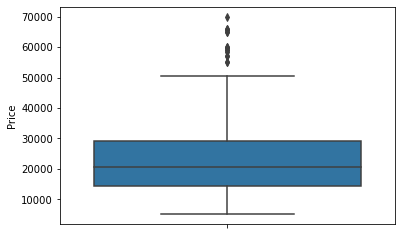

In [325]:
# checking for outlier
sns.boxplot(data=df3,y="Price")


In [328]:
# some outlier can be seen in box plot
df3.shape # shape before removing outliers

(663, 5)

In [338]:
# IQR
Q1 = np.percentile(df3['Price'], 25)

Q3 = np.percentile(df3['Price'], 75)
IQR = Q3 - Q1

# Above Upper bound
upper=Q3+1.5*IQR
#Below Lower bound
lower=Q1-1.5*IQR

# Removing outliers
df3=df3[(df3['Price']>lower)&(df['Price']<upper)]


C:\Users\ASHRAF\AppData\Local\Temp\ipykernel_3180\1840271055.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df3[(df3['Price']>lower)&(df['Price']<upper)]


In [341]:
df3.shape # shape after removing outliers

(644, 5)

<AxesSubplot:ylabel='Price'>

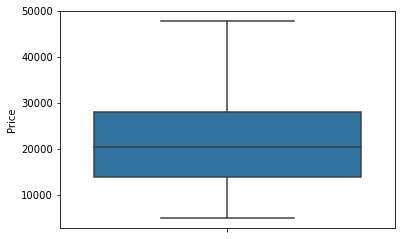

In [343]:
# checking for outlier
sns.boxplot(data=df3,y="Price")

In [344]:
# all looks great now we can start our EDA

In [347]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 10 to 765
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             644 non-null    object 
 1   Capacity(kg)      644 non-null    float64
 2   Price             644 non-null    int64  
 3   Rating(out of 5)  644 non-null    float64
 4   Total reviews     644 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ KB


In [348]:
df3.describe()

,Capacity(kg),Price,Rating(out of 5),Total reviews
count,644.000000,644.000000,644.000000,644.000000
mean,7.489907,21525.197205,4.290062,822.976708
std,1.192697,9641.989836,0.200607,1632.300711
min,1.500000,4990.000000,2.800000,0.000000
25%,7.000000,14074.000000,4.200000,6.750000
50%,7.000000,20490.000000,4.300000,113.000000
75%,8.000000,27990.000000,4.400000,930.000000
max,14.000000,47900.000000,4.900000,6574.000000


In [349]:
df3.nunique()

Brand                36
Capacity(kg)         22
Price               308
Rating(out of 5)     17
Total reviews       141
dtype: int64

In [468]:
# Maximum current price of each brand
p=df3[['Price','Brand']].groupby('Brand').max().sort_values('Price',ascending=False)
p

,Price
Brand,
BOSCH,47900
SAMSUNG,47500
LG,46990
Panasonic,45990
Haier,42500
IFB,40990
Whirlpool,40500
Siemens,39400
TOSHIBA,32990


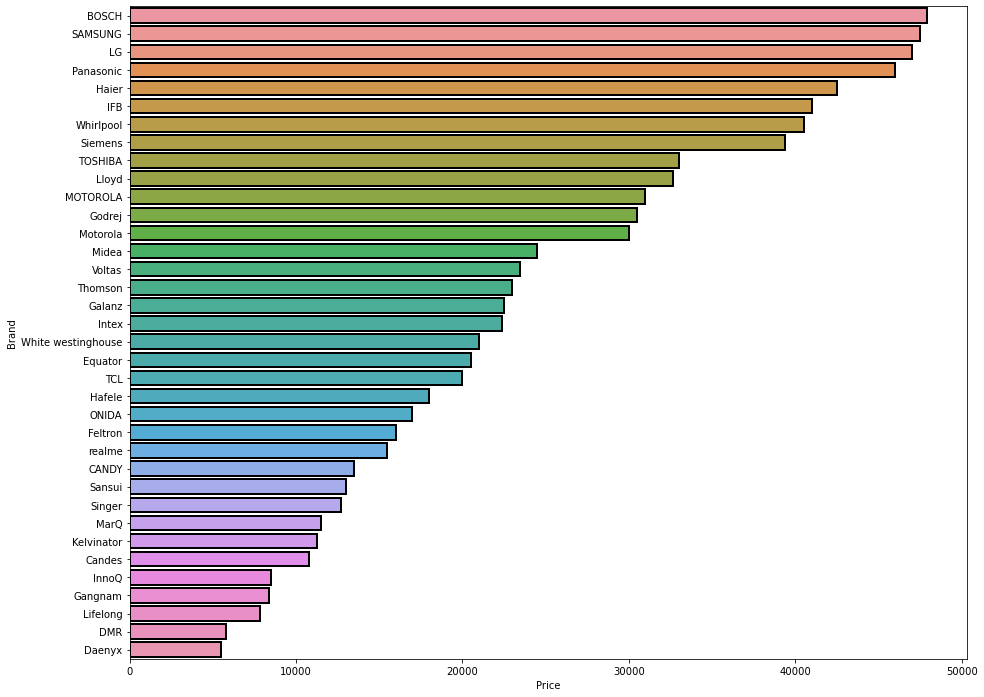

Bosch Washing Machine is most expensive


In [374]:
# plot
plt.figure(figsize=(15,12))
sns.barplot(data=p,x='Price',y=p.index,edgecolor='black',linewidth=2)
plt.show()

print("Bosch Washing Machine is most expensive")

In [375]:
# Total reviews of all washing machines
df3['Brand'].count()

644

In [376]:
# Total unique Brands
df3['Brand'].nunique()

36

In [377]:
# Name of all Brands
df3['Brand'].unique()

array(['SAMSUNG', 'Voltas', 'Whirlpool', 'realme', 'MarQ', 'Equator',
       'LG', 'IFB', 'Lloyd', 'Midea', 'Haier', 'Panasonic', 'Sansui',
       'BOSCH', 'ONIDA', 'Gangnam', 'DMR', 'InnoQ', 'Thomson', 'Godrej',
       'MOTOROLA', 'White westinghouse', 'Galanz', 'CANDY', 'Candes',
       'Siemens', 'Intex', 'Lifelong', 'Singer', 'TCL', 'Daenyx',
       'Hafele', 'Motorola', 'Kelvinator', 'Feltron', 'TOSHIBA'],
      dtype=object)

In [402]:
# Total washing machine of each brand
c=df3['Brand'].value_counts()
c

SAMSUNG               104
IFB                    90
LG                     88
Whirlpool              62
Godrej                 33
Haier                  31
MarQ                   30
BOSCH                  28
Midea                  27
Voltas                 22
ONIDA                  19
Panasonic              19
Equator                16
Lloyd                  12
Thomson                 8
realme                  7
White westinghouse      6
Siemens                 5
Sansui                  5
Candes                  4
Gangnam                 4
InnoQ                   4
MOTOROLA                3
Galanz                  3
CANDY                   2
DMR                     2
Intex                   1
Lifelong                1
Singer                  1
TCL                     1
Daenyx                  1
Hafele                  1
Motorola                1
Kelvinator              1
Feltron                 1
TOSHIBA                 1
Name: Brand, dtype: int64

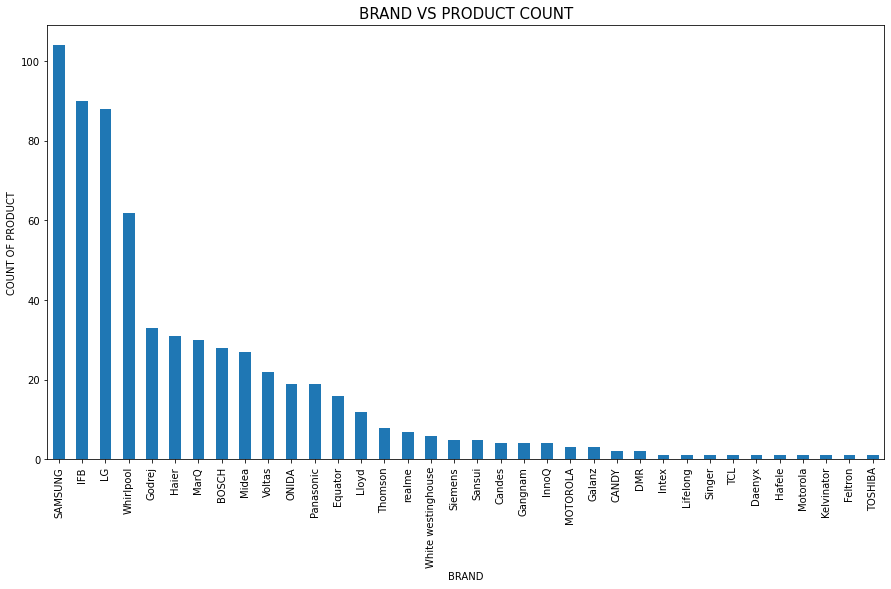

In [419]:
# plot
plt.figure(figsize=(15,8))
c.plot(kind='bar')
plt.xlabel('BRAND')
plt.ylabel("COUNT OF PRODUCT")
plt.title("BRAND VS PRODUCT COUNT",size=15)
plt.show()

In [427]:
# max Rating of each Brand
df3[['Brand','Rating(out of 5)']].groupby('Brand').max().sort_values('Rating(out of 5)',ascending=False)

,Rating(out of 5)
Brand,
White westinghouse,4.9
IFB,4.9
LG,4.8
Godrej,4.8
Whirlpool,4.7
SAMSUNG,4.7
Midea,4.7
Voltas,4.6
Equator,4.6


In [431]:
# average Rating of each Brand
df3[['Brand','Rating(out of 5)']].groupby('Brand').mean().sort_values(by=['Rating(out of 5)'],ascending=False)

,Rating(out of 5)
Brand,
White westinghouse,4.466667
Kelvinator,4.400000
TOSHIBA,4.400000
Feltron,4.400000
Motorola,4.400000
Sansui,4.380000
MOTOROLA,4.366667
ONIDA,4.352632
Thomson,4.350000


In [433]:
# Highest Rated brands                                     
df3[df3['Rating(out of 5)']==df['Rating(out of 5)'].max()]

,Brand,Capacity(kg),Price,Rating(out of 5),Total reviews
764,White westinghouse,8.0,9499,4.9,1
765,IFB,7.0,27990,4.9,1


In [467]:
# most expensive Brand                                        
df3[df3['Price']==df['Price'].max()]



,Brand,Capacity(kg),Price,Rating(out of 5),Total reviews
313,BOSCH,9.0,47900,4.3,6574


In [483]:
# finding budget washing maching --price<25000,rating>=4 ,total reviews>500,capacity>=6.5
df3[(df3['Price']<25000) & (df3['Rating(out of 5)']>=4) & (df3['Capacity(kg)']>=7) & (df3['Total reviews']>1000)].sort_values('Price')[:10]

,Brand,Capacity(kg),Price,Rating(out of 5),Total reviews
163,MarQ,7.5,5190,4.3,2045
375,ONIDA,7.0,5890,4.3,1118
254,InnoQ,7.5,7289,4.3,1115
361,Lifelong,7.5,7850,4.3,1118
345,ONIDA,7.0,7990,4.3,1118
242,realme,7.5,8690,4.3,1237
316,Candes,8.5,8990,4.3,6574
150,Thomson,7.5,8990,4.3,2045
176,Voltas,7.0,9190,4.3,2643
307,Lloyd,7.5,9990,4.3,6574


In [ ]:
# scrap the washing maching data from flipkart website using requests, beautifulsoup libraries
# use libraries like numpy,pandas,matplotlib
# we found null values (removed) & outliers that are removed (by IQR method) for our further analysis.
# most expensive washing machine is of Bosch brand 
# higest rated brand are Whit westinghouse,IFB
# Cheapest brand is Daenyx
# finally find 10 budget washing machine brand wise